<a href="https://colab.research.google.com/github/GDharan10/MachineLearningAlgorithmFromScratch/blob/main/Tree-Based%20Algorithms%20/%20DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**Used for predicting both continuous and categorical values.**

Decision Trees are versatile supervised learning algorithms used for both classification and regression tasks. They partition the data into subsets based on the features and recursively split the data into smaller subsets until the data in each subset is homogeneous with respect to the target variable. The goal is to create a tree that predicts the target variable by learning simple decision rules inferred from the data features.




# **How It Works**

Decision Trees work by recursively partitioning the data based on the feature that best separates the data at each node. Each internal node represents a "decision" based on a feature, and each leaf node represents the target variable's value. The tree is built using algorithms that select the best feature to split the data at each step, typically based on metrics like information gain or Gini impurity.

# **Background Python Code**
Below is the Python code for implementing linear regression from scratch.

In [1]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def visualize(self):
        from graphviz import Digraph

        def add_nodes_edges(dot, node, counter=0):
            if node.is_leaf_node():
                dot.node(name=str(counter), label=str(node.value), shape='box')
                return counter

            dot.node(name=str(counter), label=f'X{node.feature} <= {node.threshold:.2f}')
            left_counter = counter + 1
            right_counter = add_nodes_edges(dot, node.left, left_counter)
            dot.edge(str(counter), str(left_counter), 'True')
            dot.edge(str(counter), str(right_counter + 1), 'False')
            return add_nodes_edges(dot, node.right, right_counter + 1)

        dot = Digraph()
        add_nodes_edges(dot, self.root)
        return dot

# **Comparing the Algorithm with the Class**

The Node class represents nodes in the Decision Tree, where each node either has a split condition (feature, threshold) or a leaf value.

The DecisionTree class implements the Decision Tree algorithm, allowing training (fitting) on data and making predictions. Here’s a breakdown of its components:

1. **Node Class (Node):**

 * **Attributes:**

    * **feature:** Index of the feature used for splitting at this node.
    * **threshold:** Threshold value for the split.
    * **left, right:** Child nodes (subtrees) for the left and right splits.
    * **value:** Leaf node value if the node is a leaf.

 * **Methods:**

    * **is_leaf_node():** Checks if the current node is a leaf node.

2. **DecisionTree Class (DecisionTree):**

 * **Attributes:**

    * **min_samples_split:** Minimum number of samples required to split an internal node.
    * **max_depth:** Maximum depth of the tree.
    * **n_features:** Number of features to consider when looking for the best split.
    * **root:** Root node of the Decision Tree.

 * **Methods:**

    * **fit(X, y):** Trains the Decision Tree using the provided features (X) and labels (y).
    * **_grow_tree(X, y, depth):** Recursively grows the Decision Tree by finding the best split at each node.
    * **_best_split(X, y, feat_idxs):** Finds the best feature and threshold to split the data based on information gain.
    * **_information_gain(y, X_column, threshold):** Calculates the information gain when splitting based on a specific feature and threshold.
    * **_split(X_column, split_thresh):** Splits the data into left and right indices based on a feature's threshold.
    * **_entropy(y):** Calculates the entropy of the target variable y.
    * **_most_common_label(y):** Returns the most common label in y.
    * **predict(X):** Predicts the target variable for new data points X using the trained Decision Tree.
    * **_traverse_tree(x, node):** Traverses the Decision Tree from the root node to make predictions for a single data point x.

**Summary:**
 * **Node Class:** Represents nodes in the Decision Tree structure, either with split conditions or leaf values.
 * **DecisionTree Class:** Implements the Decision Tree algorithm including tree growing, splitting criteria (information gain), entropy calculation, and prediction traversal.

# **Explanation of the fit method**


## **Initial Setup**

Let's consider a simple example with 3 samples and 2 features:

In [ ]:
import numpy as np

# Example data
X = np.array([[2, 3],
              [5, 4],
              [9, 6],
              [4, 7],
              [8, 1]])
y = np.array([0, 1, 1, 0, 1])

# **Implementation and Visualization**

Accuracy: 0.92


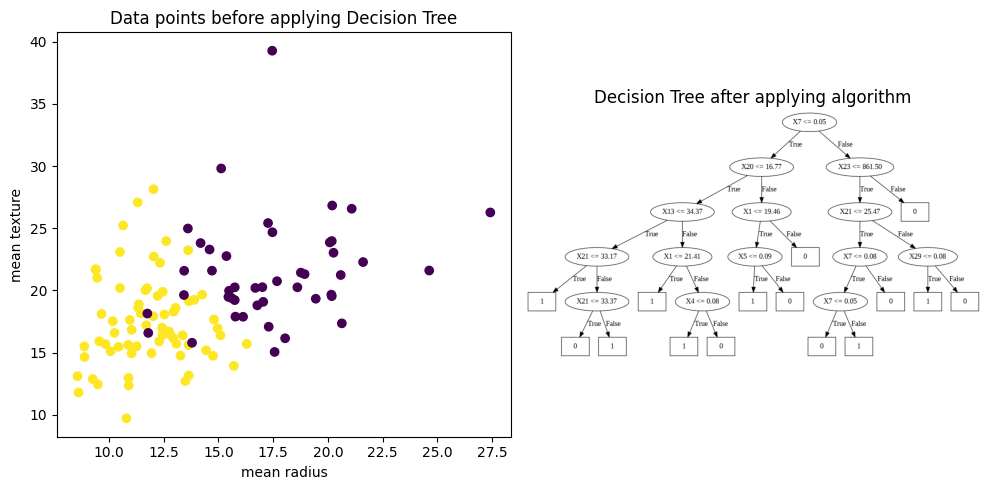

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Fit the model
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Calculate accuracy
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(f'Accuracy: {acc:.2f}')

# Visualize the data points (using only two features for visualization purposes)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Data points before applying Decision Tree')

# Visualize the decision tree
plt.subplot(1, 2, 2)
tree_plot = clf.visualize()
tree_plot.render('decision_tree', format='png')
plt.imshow(plt.imread('decision_tree.png'))
plt.axis('off')
plt.title('Decision Tree after applying algorithm')

plt.tight_layout()
plt.show()


# **Implementation Details**

# **Key Considerations for DecisionTrees Modeling:**